In [1]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\krishna chaithanya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import csv
import random
from faker import Faker
from datetime import datetime

In [3]:
#initialize Faker
fake = Faker()
random.seed(42)

In [4]:
# Define the schema fields
fields = [
    'order_id', 'customer_id', 'customer_name', 'product_id', 'product_name',
    'product_category', 'payment_type', 'qty', 'price', 'datetime', 'country',
    'city', 'ecommerce_website_name', 'payment_txn_id', 'payment_txn_success',
    'failure_reason'
]

In [5]:
# Define sample data
product_categories = ['Stationery', 'Electronics', 'Books', 'Clothing', 'Toys']
payment_types = ['Card', 'Internet Banking', 'UPI', 'Wallet']
countries = {
    'India': ['Mumbai', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata'],
    'USA': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Boston'],
    'UK': ['London', 'Manchester', 'Birmingham', 'Leeds', 'Oxford'],
    'Germany': ['Berlin', 'Munich', 'Frankfurt', 'Hamburg', 'Stuttgart']
}
websites = ['www.amazon.com', 'www.flipkart.com', 'www.ebay.in', 'www.tatacliq.com', 'www.snapdeal.com']

In [6]:
# Function to generate a single record
def generate_record(order_id):
    customer_id = random.randint(100, 999)
    customer_name = fake.name()
    product_id = random.randint(200, 299)
    product_name = fake.word().capitalize()
    product_category = random.choice(product_categories)
    payment_type = random.choice(payment_types)
    qty = random.randint(1, 10)
    price = round(random.uniform(5.0, 1000.0), 2)
    order_datetime = fake.date_time_between(start_date='-1y', end_date='now').strftime("%Y-%m-%d %H:%M")
    country = random.choice(list(countries.keys()))
    city = random.choice(countries[country])
    ecommerce_website_name = random.choice(websites)
    payment_txn_id = fake.uuid4().split('-')[0]
    payment_txn_success = random.choice(['Y', 'N'])
    failure_reason = "" if payment_txn_success == 'Y' else "Invalid CVV."
    
    return [
        order_id, customer_id, customer_name, product_id, product_name,
        product_category, payment_type, qty, price, order_datetime, country,
        city, ecommerce_website_name, payment_txn_id, payment_txn_success,
        failure_reason
    ]

In [7]:
# Generate 10,000 records and write to CSV
with open('ecommerce_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(fields)  # Write the header
    for order_id in range(1, 10001):
        writer.writerow(generate_record(order_id))

print("Data generation complete. The file 'ecommerce_data.csv' has been created.") 

Data generation complete. The file 'ecommerce_data.csv' has been created.


In [8]:
import pandas as pd

In [9]:
# Load the dataset
data = pd.read_csv('ecommerce_data.csv')
print(data)

      order_id  customer_id    customer_name  product_id product_name  \
0            1          754   Thomas Schultz         214         Data   
1            2          132   Matthew Lawson         203     Language   
2            3          325     Dana Acevedo         257     Probably   
3            4          259    Mario Anthony         227    Structure   
4            5          926  Dr. Justin Cruz         205          Sit   
...        ...          ...              ...         ...          ...   
9995      9996          718    John Williams         204         Fall   
9996      9997          991   Veronica Lewis         218     Specific   
9997      9998          182      John Graham         211       Former   
9998      9999          326     Beverly Moon         209      College   
9999     10000          106    Andrew Nguyen         295       Policy   

     product_category      payment_type  qty   price          datetime  \
0          Stationery               UPI    4  227

In [10]:
# Display the first few rows
print(data.head())

   order_id  customer_id    customer_name  product_id product_name  \
0         1          754   Thomas Schultz         214         Data   
1         2          132   Matthew Lawson         203     Language   
2         3          325     Dana Acevedo         257     Probably   
3         4          259    Mario Anthony         227    Structure   
4         5          926  Dr. Justin Cruz         205          Sit   

  product_category      payment_type  qty   price          datetime country  \
0       Stationery               UPI    4  227.09  2024-04-18 22:08   India   
1       Stationery  Internet Banking    4  507.83  2023-09-19 13:10   India   
2             Toys               UPI    1  760.01  2023-09-16 11:40     USA   
3            Books              Card    2  383.03  2024-01-05 01:26      UK   
4         Clothing              Card    7   83.41  2024-06-03 23:03      UK   

         city ecommerce_website_name payment_txn_id payment_txn_success  \
0     Kolkata         www.ama

In [11]:
# Display the data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                10000 non-null  int64  
 1   customer_id             10000 non-null  int64  
 2   customer_name           10000 non-null  object 
 3   product_id              10000 non-null  int64  
 4   product_name            9992 non-null   object 
 5   product_category        10000 non-null  object 
 6   payment_type            10000 non-null  object 
 7   qty                     10000 non-null  int64  
 8   price                   10000 non-null  float64
 9   datetime                10000 non-null  object 
 10  country                 10000 non-null  object 
 11  city                    10000 non-null  object 
 12  ecommerce_website_name  10000 non-null  object 
 13  payment_txn_id          10000 non-null  object 
 14  payment_txn_success     10000 non-null 

In [12]:
# Summary statistics for numerical columns
print(data.describe())

          order_id   customer_id    product_id         qty         price
count  10000.00000  10000.000000  10000.000000  10000.0000  10000.000000
mean    5000.50000    547.739500    249.302400      5.5123    506.977226
std     2886.89568    260.198988     29.047935      2.8701    289.339545
min        1.00000    100.000000    200.000000      1.0000      5.050000
25%     2500.75000    321.000000    224.000000      3.0000    254.002500
50%     5000.50000    542.000000    249.000000      5.0000    507.120000
75%     7500.25000    774.000000    275.000000      8.0000    760.857500
max    10000.00000    999.000000    299.000000     10.0000    999.980000


In [13]:
# checking the data types of each column
print(data.dtypes)

order_id                    int64
customer_id                 int64
customer_name              object
product_id                  int64
product_name               object
product_category           object
payment_type               object
qty                         int64
price                     float64
datetime                   object
country                    object
city                       object
ecommerce_website_name     object
payment_txn_id             object
payment_txn_success        object
failure_reason             object
dtype: object


In [14]:
# Check for missing values
print(data.isnull().sum())

order_id                     0
customer_id                  0
customer_name                0
product_id                   0
product_name                 8
product_category             0
payment_type                 0
qty                          0
price                        0
datetime                     0
country                      0
city                         0
ecommerce_website_name       0
payment_txn_id               0
payment_txn_success          0
failure_reason            5016
dtype: int64


In [15]:
#Filling the null values 
data = data.assign(product_name = data['product_name'].fillna('Unknown Product'))
print("Inserted the values for product nulls")

Inserted the values for product nulls


In [16]:
condition = (data['payment_txn_success'] == 'Y') & (data['failure_reason'].isnull())
data.loc[condition, 'failure_reason'] = 'Payment_successful'
print("Inserted the values for payment nulls successfully")

Inserted the values for payment nulls successfully


In [17]:
print(data.head())

   order_id  customer_id    customer_name  product_id product_name  \
0         1          754   Thomas Schultz         214         Data   
1         2          132   Matthew Lawson         203     Language   
2         3          325     Dana Acevedo         257     Probably   
3         4          259    Mario Anthony         227    Structure   
4         5          926  Dr. Justin Cruz         205          Sit   

  product_category      payment_type  qty   price          datetime country  \
0       Stationery               UPI    4  227.09  2024-04-18 22:08   India   
1       Stationery  Internet Banking    4  507.83  2023-09-19 13:10   India   
2             Toys               UPI    1  760.01  2023-09-16 11:40     USA   
3            Books              Card    2  383.03  2024-01-05 01:26      UK   
4         Clothing              Card    7   83.41  2024-06-03 23:03      UK   

         city ecommerce_website_name payment_txn_id payment_txn_success  \
0     Kolkata         www.ama

In [18]:
# Check for missing values
print(data.isnull().sum())

order_id                  0
customer_id               0
customer_name             0
product_id                0
product_name              0
product_category          0
payment_type              0
qty                       0
price                     0
datetime                  0
country                   0
city                      0
ecommerce_website_name    0
payment_txn_id            0
payment_txn_success       0
failure_reason            0
dtype: int64


In [19]:
# Check for duplicates
print(data.duplicated().sum())

0


In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\krishna chaithanya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

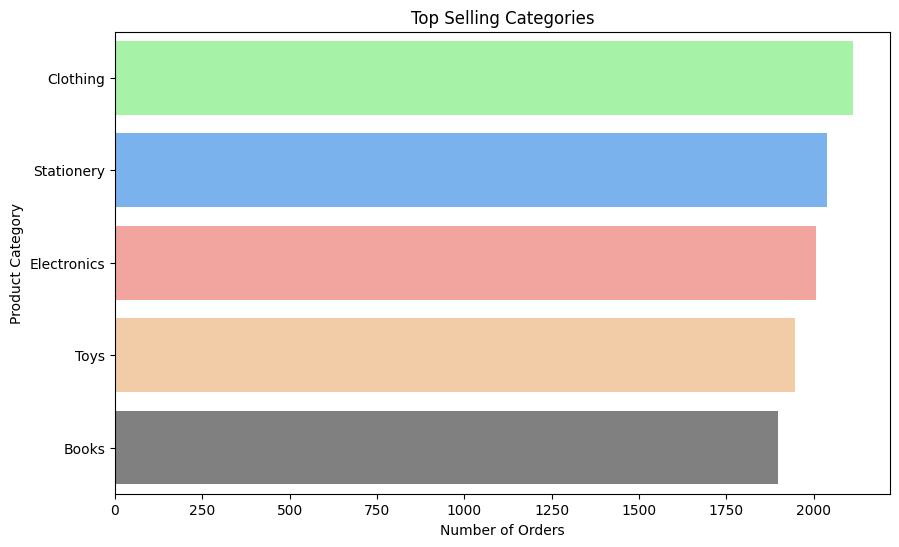

In [31]:
# Get the unique number of categories
unique_categories = data['product_category'].nunique()

# Adjust your custom palette to match the number of unique categories
custom_palette = sns.color_palette(['#66B2FF', '#FFCC99', '#808080', '#99FF99', '#FF9990' ][:unique_categories])

plt.figure(figsize=(10, 6))
sns.countplot(y='product_category', data=data, order=data['product_category'].value_counts().index, hue='product_category', palette=custom_palette, legend=False)
plt.title('Top Selling Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show()

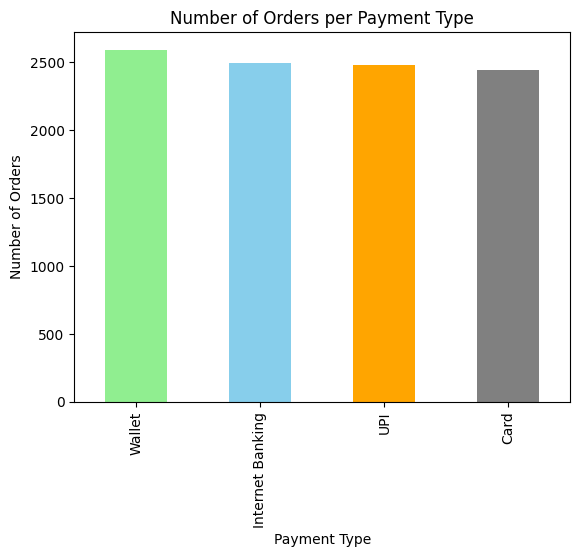

In [32]:
# Define custom colors for each bar
custom_colors = [ 'lightgreen','skyblue', 'orange', 'gray']  # Adjust based on the number of payment types

payment_type_counts = data['payment_type'].value_counts()
payment_type_counts.plot(kind='bar', color=custom_colors)
plt.title('Number of Orders per Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.show()

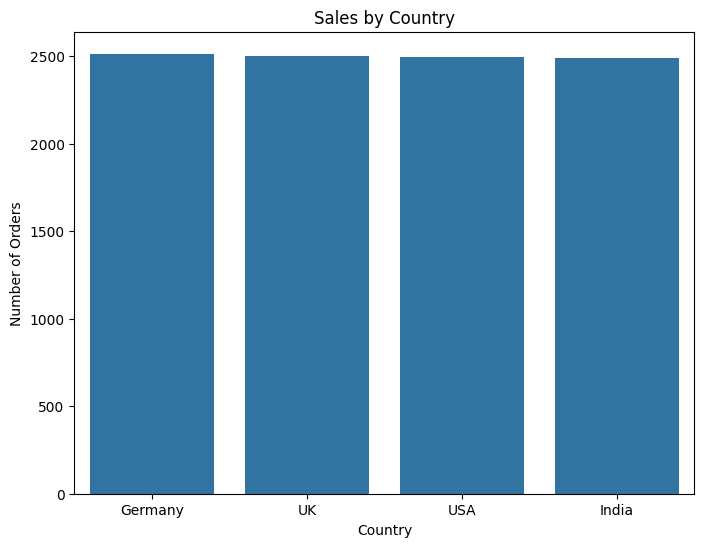

In [24]:
# Example Visualization: Sales by Country
plt.figure(figsize=(8, 6))
sns.countplot(x='country', data=data, order=data['country'].value_counts().index)
plt.title('Sales by Country')
plt.ylabel('Number of Orders')
plt.xlabel('Country')
plt.show()

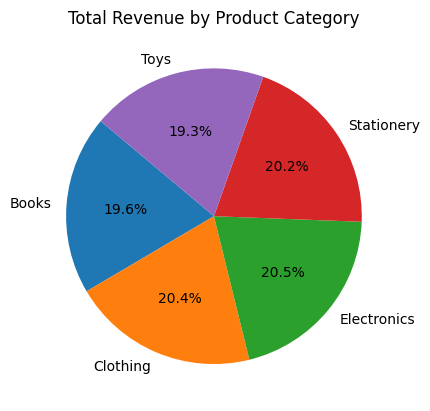

In [25]:
# Example Visualization: Total Revenue by Product Category
data['revenue'] = data['qty'] * data['price']
category_revenue = data.groupby('product_category')['revenue'].sum()
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Product Category')
plt.ylabel('')
plt.show()

In [26]:
# Top Selling Category Per Country
top_categories = data.groupby(['country', 'product_category']).size().unstack().idxmax(axis=1)
print("Top Selling Category Per Country:")
print(top_categories)

Top Selling Category Per Country:
country
Germany      Clothing
India        Clothing
UK         Stationery
USA          Clothing
dtype: object


In [27]:
# Product Popularity Change Throughout the Year Per Country
data['month'] = pd.to_datetime(data['datetime']).dt.month
popularity_trends = data.groupby(['country', 'month', 'product_category']).size().unstack()
print("Product Popularity Change Throughout the Year Per Country:")
print(popularity_trends)

Product Popularity Change Throughout the Year Per Country:
product_category  Books  Clothing  Electronics  Stationery  Toys
country month                                                   
Germany 1            39        47           43          38    32
        2            47        47           44          41    33
        3            36        52           42          36    40
        4            33        54           45          41    41
        5            35        42           46          48    35
        6            47        44           49          48    38
        7            33        34           37          47    39
        8            48        43           33          41    44
        9            39        51           52          44    46
        10           42        50           38          29    35
        11           42        37           42          49    53
        12           39        33           42          50    40
India   1            47        

In [28]:
# Locations with the Highest Traffic of Sales
high_traffic_cities = data['city'].value_counts().head(10)
print("Locations with Highest Traffic of Sales:")
print(high_traffic_cities)

Locations with Highest Traffic of Sales:
city
Oxford         549
Bengaluru      532
Los Angeles    525
Hamburg        516
Kolkata        515
Stuttgart      513
New York       511
Leeds          507
Munich         505
Houston        504
Name: count, dtype: int64


In [29]:
# Times with the Highest Traffic of Sales Per Country

# Set display options to avoid truncation
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Ensure wide DataFrames are not wrapped
pd.set_option('display.max_colwidth', None)  # Display entire content of each column

data['hour'] = pd.to_datetime(data['datetime']).dt.hour
traffic_by_time = data.groupby(['country', 'hour']).size().unstack()
print("Times with Highest Traffic of Sales Per Country:")
print(traffic_by_time)

Times with Highest Traffic of Sales Per Country:
hour      0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
country                                                                         
Germany   96  106  112  109  114  108   92  104  118   96  114  103  116  113   
India     86  116  101   97   91  100   95   99  119  109  104   90  125  105   
UK       112   96  101  101   98  104  101   91  108   99  112  124   94  105   
USA      102   99  110  100  115   98   95  109  100   84  116  114   92  111   

hour      14   15   16   17   18   19   20   21   22   23  
country                                                    
Germany  101  106  107   96   76  111  107  102   80  128  
India    113  103  105  119  106  109   97   95   99  106  
UK       115  101  106   96  108  102   98  112  112  104  
USA      107  101  115  115  106  102  102  108  113   82  


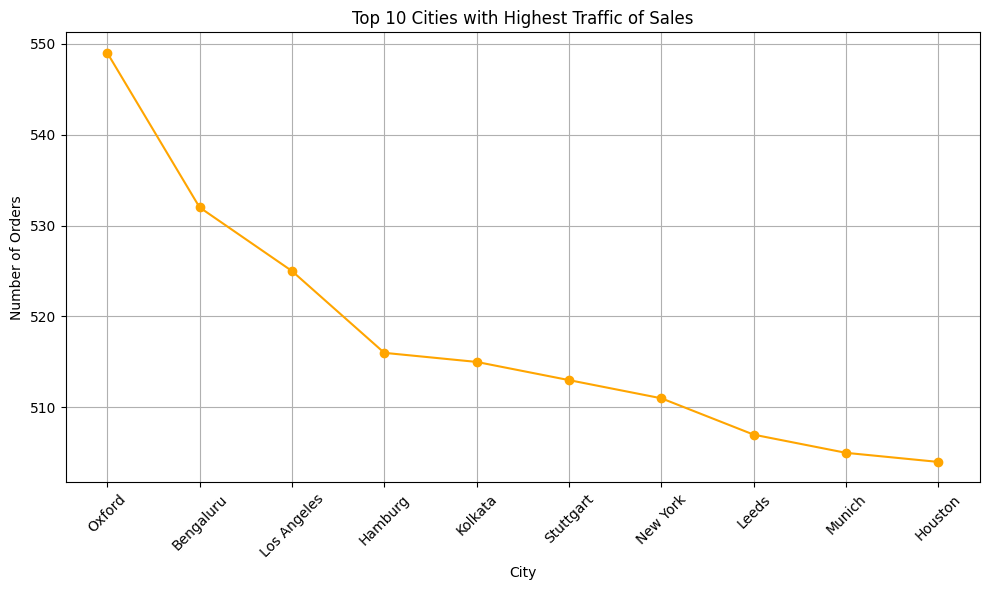

In [30]:
# Assuming `data` has a 'city' column and you want to visualize the top 10 cities by traffic (number of orders)
high_traffic_cities = data['city'].value_counts().head(10)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(high_traffic_cities.index, high_traffic_cities.values, marker='o', color='orange')
plt.title('Top 10 Cities with Highest Traffic of Sales')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate city names for readability
plt.grid(True)  # Optional: add grid for clarity
plt.tight_layout()  # Adjust layout for better fit
plt.show()